In [133]:
import numpy as np
import arms
import matplotlib.pyplot as plt
from scipy.stats import bernoulli



## Q1) BERNOUILLI BANDIT MODEL

means: [0.7, 0.5, 0.35, 0.15]
mu_max: 0.7


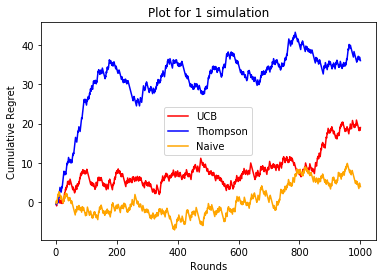

In [134]:

arm1 = arms.ArmBernoulli(0.7, random_state=np.random.randint(1, 312414))
arm2 = arms.ArmBernoulli(0.5, random_state=np.random.randint(1, 312414))
arm3 = arms.ArmBernoulli(0.35, random_state=np.random.randint(1, 312414))
arm4 = arms.ArmBernoulli(0.15, random_state=np.random.randint(1, 312414))

MAB = [arm1, arm2, arm3, arm4]

# bandit : set of arms

nb_arms = len(MAB)
means = [el.mean for el in MAB]

# Display the means of your bandit (to find the best)
print('means: {}'.format(means))
mu_max = np.max(means)
print('mu_max: {}'.format(mu_max))

def UCB1(T, MAB):
    samples = dict()
    lenMab = len(MAB)
    
    rew = []
    draws = []
    
    for i in range(lenMab):
        s = float(MAB[i].sample())
        samples[i] = []
        samples[i].append(s)
        draws.append(i)
        rew.append(s)
    
    c = 0.45
    
    for t in range(lenMab, T):
        A = [computeUCB(samples[i], t, c) for i in range(lenMab)]
        A_t = np.random.choice(np.flatnonzero(A == np.max(A))) # we use randomization in case of equality
        s = float(MAB[A_t].sample())
        samples[A_t].append(s)
        draws.append(A_t)
        rew.append(s)
        
    return rew, draws

def computeUCB(samples, t, c):
    return np.mean(samples) + c * np.sqrt(np.log(T)/(2*len(samples)))

def TS(T, MAB):
    samples = dict()
    lenMab = len(MAB)
    
    for i in range(lenMab):
        samples[i] = []
    
    rew = []
    draws = []
    
    for t in range(T):
        A = [computeTS(samples[i]) for i in range(lenMab)]
        A_t = np.random.choice(np.flatnonzero(A == np.max(A))) # we use randomization in case of equality
        s = float(MAB[A_t].sample())
        samples[A_t].append(s)
        draws.append(A_t)
        rew.append(s)
        
    return rew, draws

def computeTS(samples):
    S_a = np.sum(samples)
    N_a = len(samples)
    return np.random.beta(S_a + 1, N_a - S_a + 1)
        

def Naive(T, MAB):
    samples = dict()
    lenMab = len(MAB)
    
    rew = []
    draws = []
    
    for i in range(lenMab):
        s = int(MAB[i].sample())
        samples[i] = []
        samples[i].append(s)
        draws.append(i)
        rew.append(s)
    
    for t in range(lenMab, T):
        A = [np.mean(samples[i]) for i in range(lenMab)]
        A_t = np.random.choice(np.flatnonzero(A == np.max(A))) # we use randomization in case of equality
        s = int(MAB[A_t].sample())
        samples[A_t].append(s)
        draws.append(A_t)
        rew.append(s)
        
    return rew, draws


# Comparison of the regret on one run of the bandit algorithm
# try to run this multiple times, you should observe different results

T = 1000  # horizon

rew1, draws1 = UCB1(T, MAB)
reg1 = mu_max * np.arange(1, T + 1) - np.cumsum(rew1)
rew2, draws2 = TS(T, MAB)
reg2 = mu_max * np.arange(1, T + 1) - np.cumsum(rew2)
rew3, draws3 = Naive(T, MAB)
reg3 = mu_max * np.arange(1, T + 1) - np.cumsum(rew3)

# add oracle t -> C(p)log(t)

plt.figure(1)
plt.title("Plot for 1 simulation")
x = np.arange(1, T+1)
plt.plot(x, reg1, label='UCB', color = 'red')
plt.plot(x, reg2, label='Thompson', color = 'blue')
plt.plot(x, reg3, label='Naive', color = 'orange')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.legend(loc='best')
plt.show()

# (Expected) regret curve for UCB and Thompson Sampling

When the Naive algorithm doesn't start well (i.e. when the first draw of the opitmal arm is 0), the cumulative regret diverges.

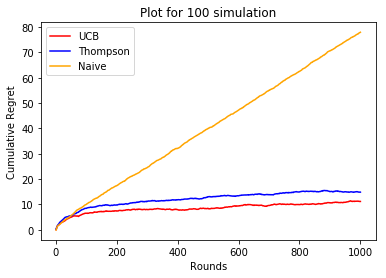

In [135]:
rew1, draws1 = UCB1(T, MAB)
reg1 = mu_max * np.arange(1, T + 1) - np.cumsum(rew1)
rew2, draws2 = TS(T, MAB)
reg2 = mu_max * np.arange(1, T + 1) - np.cumsum(rew2)
rew3, draws3 = Naive(T, MAB)
reg3 = mu_max * np.arange(1, T + 1) - np.cumsum(rew3)

for i in range(2, 100):
    rew1, draws1 = UCB1(T, MAB)
    tmpReg1 = mu_max * np.arange(1, T + 1) - np.cumsum(rew1)
    reg1 = (reg1*(i-1)+tmpReg1)/i
    rew2, draws2 = TS(T, MAB)
    tmpReg2 = mu_max * np.arange(1, T + 1) - np.cumsum(rew2)
    reg2 = (reg2*(i-1)+tmpReg2)/i
    rew3, draws3 = Naive(T, MAB)
    tmpReg3 = mu_max * np.arange(1, T + 1) - np.cumsum(rew3)
    reg3 = (reg3*(i-1)+tmpReg3)/i

# add oracle t -> C(p)log(t)

plt.figure(1)
plt.title("Plot for 100 simulation")
x = np.arange(1, T+1)
plt.plot(x, reg1, label='UCB', color = 'red')
plt.plot(x, reg2, label='Thompson', color = 'blue')
plt.plot(x, reg3, label='Naive', color = 'orange')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.legend(loc='best')
plt.show()

## Q2) Non-parametric bandits (bounded rewards)

For the TS algorithm, the algorithm we'll use is the following

<img src="TS non-linear.png">

In [180]:
arm1 = arms.ArmBernoulli(0.7, random_state=np.random.randint(1, 312414))
arm2 = arms.ArmBeta(2,2, random_state=np.random.randint(1, 312414))
arm3 = arms.ArmExp(4, random_state=np.random.randint(1, 312414))

MAB = [arm1, arm2, arm3]


nb_arms = len(MAB)
means = [el.mean for el in MAB]

# Display the means of your bandit (to find the best)
print('means: {}'.format(means))
mu_max = np.max(means)
print('mu_max: {}'.format(mu_max))


def TSNonParam(T, MAB):
    samples = dict()
    lenMab = len(MAB)
    
    for i in range(lenMab):
        samples[i] = []
    
    rew = []
    draws = []
    
    for t in range(T):
        A = [computeTSNonParam(samples[i]) for i in range(lenMab)]
        A_t = np.random.choice(np.flatnonzero(A == np.max(A))) # we use randomization in case of equality
        s = float(MAB[A_t].sample())
        b = bernoulli.rvs(s)
        samples[A_t].append(b)
        draws.append(A_t)
        rew.append(s)
        
    return rew, draws

def computeTSNonParam(samples):
    S_a = np.sum(samples)
    N_a = len(samples)
    return np.random.beta(S_a + 1, N_a - S_a + 1)
        

means: [0.7, 0.5, 0.23134263963622598]
mu_max: 0.7


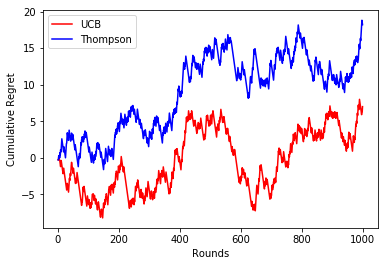

In [186]:
T = 1000  # horizon

rew1, draws1 = UCB1(T, MAB)
reg1 = mu_max * np.arange(1, T + 1) - np.cumsum(rew1)
rew2, draws2 = TSNonParam(T, MAB)
reg2 = mu_max * np.arange(1, T + 1) - np.cumsum(rew2)



# add oracle t -> C(p)log(t)

plt.figure(1)
x = np.arange(1, T+1)
plt.plot(x, reg1, label='UCB', color='red')
plt.plot(x, reg2, label='Thompson', color='blue')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.legend(loc='best')
plt.show()

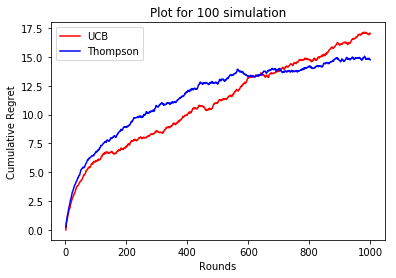

In [187]:
rew1, draws1 = UCB1(T, MAB)
reg1 = mu_max * np.arange(1, T + 1) - np.cumsum(rew1)
rew2, draws2 = TSNonParam(T, MAB)
reg2 = mu_max * np.arange(1, T + 1) - np.cumsum(rew2)

for i in range(2, 100):
    rew1, draws1 = UCB1(T, MAB)
    tmpReg1 = mu_max * np.arange(1, T + 1) - np.cumsum(rew1)
    reg1 = (reg1*(i-1)+tmpReg1)/i
    rew2, draws2 = TSNonParam(T, MAB)
    tmpReg2 = mu_max * np.arange(1, T + 1) - np.cumsum(rew2)
    reg2 = (reg2*(i-1)+tmpReg2)/i

# add oracle t -> C(p)log(t)

plt.figure(1)
plt.title("Plot for 100 simulation")
x = np.arange(1, T+1)
plt.plot(x, reg1, label='UCB', color = 'red')
plt.plot(x, reg2, label='Thompson', color = 'blue')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.legend(loc='best')
plt.show()

## Q3) Linear Bandit on Real Data

In [139]:
import numpy as np
from linearmab_models import ToyLinearModel, ColdStartMovieLensModel
import matplotlib.pyplot as plt
from tqdm import tqdm



In [140]:
def computeTheta(ZZ_lambdaI, Z_t, y):
    return np.dot(np.dot(ZZ_lambdaI, Z_t), y)[:,0]

def computeOptimalArm(theta, ZZ_lambdaI, alpha, numArms):
    a = [computeUpperBound(arm, theta, ZZ_lambdaI, alpha) for arm in range(numArms)]
    return np.argmax(a)
      
def computeUpperBound(arm, theta, ZZ_lambdaI, alpha):
    features = model.features[arm]
    beta = computeBeta(arm, ZZ_lambdaI, alpha)
    return np.dot(np.transpose(features), theta) + beta

def computeBeta(arm, ZZ_lambdaI, alpha):
    features = model.features[arm]
    insideSqrt = np.dot(np.dot(np.transpose(features),ZZ_lambdaI), features)
    beta = alpha * np.sqrt(insideSqrt)
    return beta
    

def LinUCB(model, nb_simu, nb_epochs): 
    regret = np.zeros((nb_simu, nb_epochs))
    norm_dist = np.zeros((nb_simu, nb_epochs))

    n_a = model.n_actions
    d = model.n_features

    for k in tqdm(range(nb_simu), desc="Simulating {}".format("LinUCB")):

        # we init Z and Y by randomly choosing an arm
        init = np.random.randint(0,n_a)
        Z = [np.transpose(model.features[init])]
        y = [model.reward(init)]
        l = 10e-8
        

        for t in range(nb_epochs):
            Z_t = np.transpose(Z)
            # I didn't use the trick seen in class to more efficiently compute ZZ_lambdaI
            ZZ_lambdaI = np.linalg.inv(np.dot(Z_t, Z) + l * np.eye(d))
            theta_hat = computeTheta(ZZ_lambdaI, Z_t, y)
            alpha = 10 + 1/(1+t)
            a_t = computeOptimalArm(theta_hat, ZZ_lambdaI, alpha, n_a)
            r_t = model.reward(a_t) # get the reward
            Z.append(np.transpose(model.features[a_t]))
            y.append(r_t)

            regret[k, t] = model.best_arm_reward() - r_t
            norm_dist[k, t] = np.linalg.norm(theta_hat - model.real_theta, 2)
        
    
    return regret, norm_dist

def EGreedy(model, nb_simu, nb_epochs, epsilon): 
    regret = np.zeros((nb_simu, nb_epochs))
    norm_dist = np.zeros((nb_simu, nb_epochs))

    n_a = model.n_actions
    d = model.n_features

    for k in tqdm(range(nb_simu), desc="Simulating {}".format("EGreedy")):

        # we init Z and Y by randomly choosing an arm
        init = np.random.randint(0,n_a)
        Z = [np.transpose(model.features[init])]
        y = [model.reward(init)]
        l = 10e-8

        for t in range(nb_epochs):
            value = np.random.uniform(0, 1)
            if value < epsilon:
                a_t = np.random.randint(0,n_a)
            else:
                Z_t = np.transpose(Z)
                # I didn't use the trick seen in class to more efficiently compute ZZ_lambdaI
                ZZ_lambdaI = np.linalg.inv(np.dot(Z_t, Z) + l * np.eye(d))
                theta_hat = computeTheta(ZZ_lambdaI, Z_t, y)
                alpha = 10 + 1/(1+t)
                a_t = computeOptimalArm(theta_hat, ZZ_lambdaI, alpha, n_a)
                
            r_t = model.reward(a_t) # get the reward
            Z.append(np.transpose(model.features[a_t]))
            y.append(r_t)

            regret[k, t] = model.best_arm_reward() - r_t
            norm_dist[k, t] = np.linalg.norm(theta_hat - model.real_theta, 2)
        
    
    return regret, norm_dist
    

In [141]:
def Random(model, nb_simu, nb_epochs): 
    regret = np.zeros((nb_simu, nb_epochs))

    n_a = model.n_actions
    d = model.n_features

    for k in tqdm(range(nb_simu), desc="Simulating {}".format("Random")):
        
        for t in range(nb_epochs):
            a_t = np.random.randint(0,n_a)
            r_t = model.reward(a_t) # get the reward
            regret[k, t] = model.best_arm_reward() - r_t
        
    
    return regret
    

Simulating EGreedy: 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


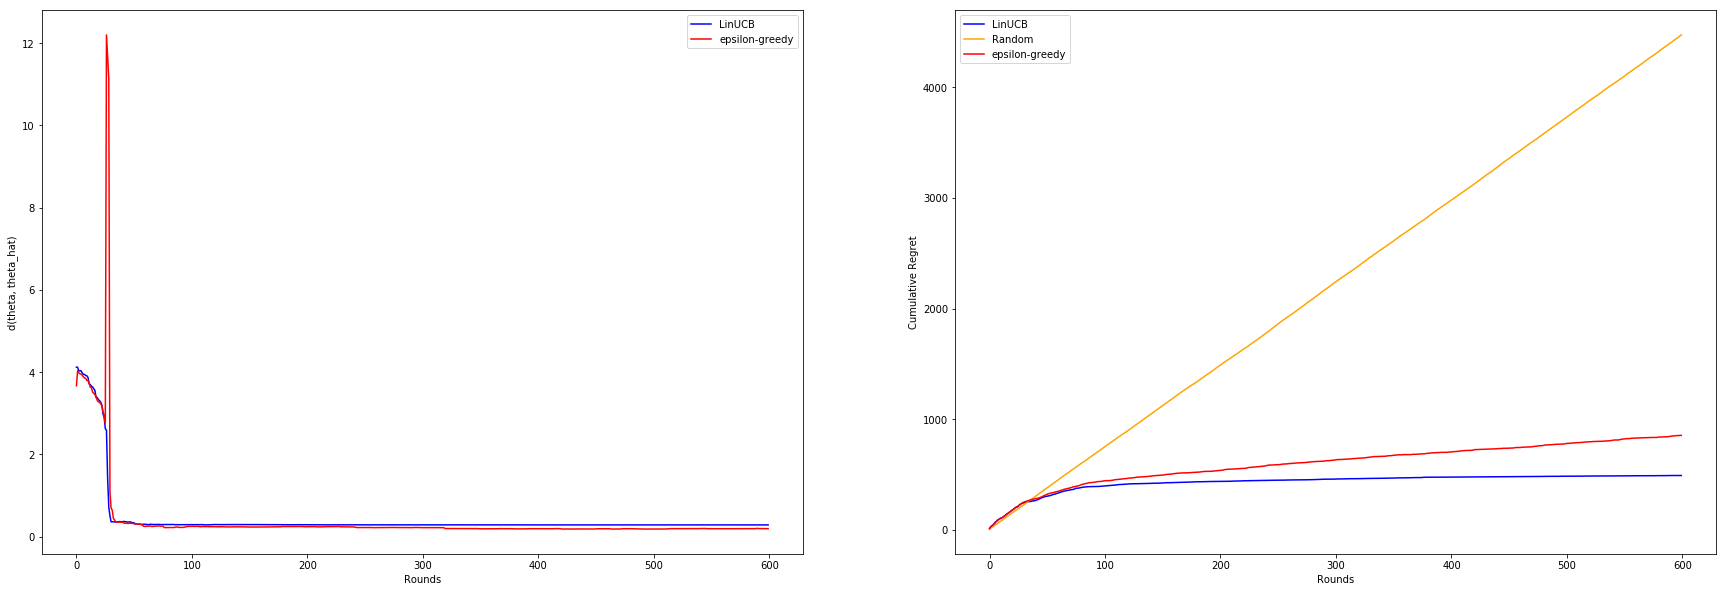

In [142]:

nb_epochs = 600


nb_simu = 10


random_state = np.random.randint(0, 24532523)
# model = ToyLinearModel(
#     n_features=8,
#     n_actions=20,
#     random_state=random_state,
#     noise=0.1)

model = ColdStartMovieLensModel(
    random_state=random_state,
    noise=0.1
)

##################################################################
# define the algorithms
# - Random
# - Linear UCB
# - Eps Greedy
# and test it!
##################################################################
linucb_regret, linucb_norm_dist = LinUCB(model, nb_simu, nb_epochs)
random_regret = Random(model, nb_simu, nb_epochs)
epsilon_regret, epsilon_norm_dist = EGreedy(model, nb_simu, nb_epochs, 0.1)


# compute average (over sim) of the algorithm performance and plot it
linucb_mean_norms = np.mean(linucb_norm_dist, axis=0)
linucb_mean_regret = np.mean(linucb_regret, axis=0)
random_mean_regret = np.mean(random_regret, axis=0)
epsilon_mean_norms = np.mean(epsilon_norm_dist, axis=0)
epsilon_mean_regret = np.mean(epsilon_regret, axis=0)

plt.figure(figsize=(30,10))
plt.subplot(121)
plt.plot(linucb_mean_norms, label="LinUCB", color = "blue")
plt.plot(epsilon_mean_norms, label="epsilon-greedy", color = "red")
plt.ylabel('d(theta, theta_hat)')
plt.xlabel('Rounds')
plt.legend()

plt.subplot(122)
plt.plot(linucb_mean_regret.cumsum(), label="LinUCB", color="blue")
plt.plot(random_mean_regret.cumsum(), label="Random", color = "orange")
plt.plot(epsilon_mean_regret.cumsum(), label="epsilon-greedy", color = "red")
plt.ylabel('Cumulative Regret')
plt.xlabel('Rounds')
plt.legend()
plt.show()

Note that I decreased the number of epochs to 400 for 2 reasons :

1) LinUCB and E-greedy converges in about ~50 epochs 

2) The cumulative random diverges very quickly so if we wan't to see the difference between the Epsilon-greedy and the LinUCB we need to decrease the number of rounds